Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading fact_bookings file

In [2]:
df_bookings=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,4/27/2022,5/1/2022,5/2/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,4/30/2022,5/1/2022,5/2/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,4/28/2022,5/1/2022,5/4/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,4/28/2022,5/1/2022,5/2/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,4/27/2022,5/1/2022,5/2/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


Exploring Data in fact_bookings

Identifying number of rows and columns


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


Unique room categories provided by Obsidian Grands

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

Booking Platforms available


In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

Share of booking platforms in booking

In [7]:
df_bookings.booking_platform.value_counts()        

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

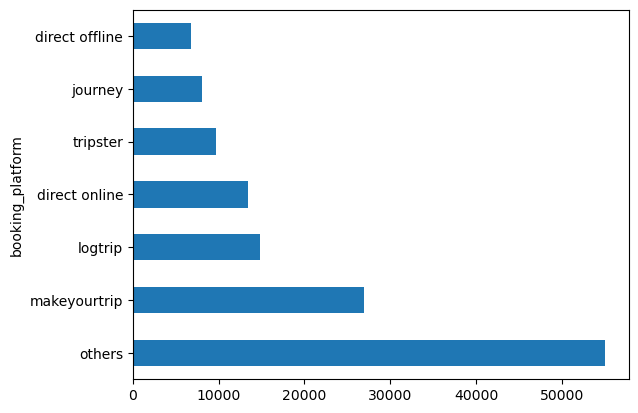

In [8]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

Statistical analysis of numerical columns of fact_bookings

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


Minimum and maximum revenue generated by Obsidian hotel

In [10]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

Reading other dimension and fact tables like dim_date, dim_hotels, dim_rooms,fact_aggregated_bookings

In [11]:
df_date=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\dim_date.csv")
df_hotels=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\dim_hotels.csv")
df_room=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\dim_rooms.csv")
df_agg_bookings=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\fact_aggregated_bookings.csv")

Exploring Data in dim_hotels data

In [12]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [13]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Obsidian Grands,Luxury,Delhi
1,16559,Obsidian Exotica,Luxury,Mumbai
2,16560,Obsidian City,Business,Delhi
3,16561,Obsidian Blu,Luxury,Delhi
4,16562,Obsidian Bay,Luxury,Delhi


In [14]:
df_hotels.property_name.unique()

array(['Obsidian Grands', 'Obsidian Exotica', 'Obsidian City',
       'Obsidian Blu', 'Obsidian Bay', 'Obsidian Palace',
       'Obsidian Seasons'], dtype=object)

No. of hotels in each category

In [15]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

No. of hotels available in each city of Obsidian

<Axes: xlabel='city'>

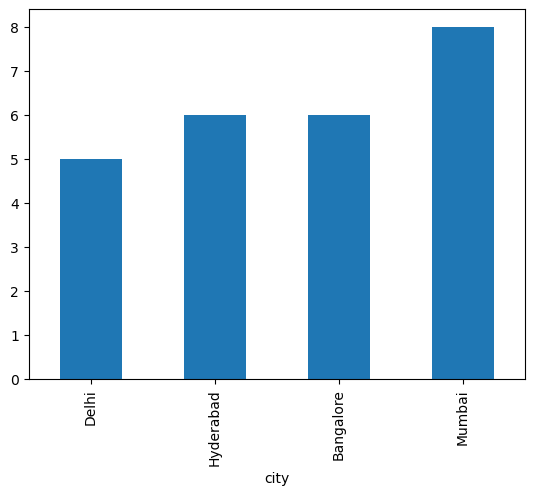

In [16]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

Exploring Data in fact_aggregated_bookings

In [17]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


Number of bookings per property_id

In [18]:
df_bookings.property_id.value_counts()

property_id
16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: count, dtype: int64

No. of successful bookings per property_id

In [19]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

Days on which bookings are greater than capacity


In [20]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


Properties that have highest capacity

In [21]:
#maximum capacity available
df_agg_bookings.capacity.max()

50.0

In [22]:
# filtering data having maximum capacity
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


Data Cleaning in df_bookings


In [23]:
#Statistical Analysis
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


As we can see for no_guests we have negative values which is not possible


In [24]:
# finding rows which has no_guest less than zero
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,4/27/2022,5/1/2022,5/2/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,4/28/2022,5/1/2022,5/2/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,5/12/2022,5/12/2022,5/14/2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,5/8/2022,5/12/2022,5/14/2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,5/12/2022,5/17/2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,5/10/2022,5/12/2022,5/17/2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,6/5/2022,6/8/2022,6/13/2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,7/19/2022,7/20/2022,7/22/2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,7/30/2022,7/31/2022,8/1/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
df_bookings.shape

(134590, 12)

Before dropping negative no_guests we have 134590 rows

Dropping rows with no of guests as negative value

In [26]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [27]:
df_bookings.shape

(134578, 12)

After dropping we have 134578 rows

Finding out minimum and maximum revenue generated for indentifying outliers

In [28]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In a single booking, generating 28,560,000 in revenue is not possible.

How to solve:
Consult with the manager to determine the maximum revenue expected from a single booking.
    
Alternatively, apply the 3 standard deviation (3σ) technique to remove outliers:
Filter out values that lie outside the range (μ - 3σ, μ + 3σ), where μ is the mean and σ is the standard deviation.

Finding mean and standard deviation of revenue generated

In [29]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [30]:
upper_limit=avg+3*std
upper_limit

294498.50173198653

In [31]:
lower_limit=avg-3*std
lower_limit

-263742.4278566132

Here lower_limit is not important as revenue generated cannot be negative

In [32]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


Output is null hence on lower_side we are safe

Now finding revenue values which are more than upper limit

In [33]:
# outliers in revenue_generated
df_bookings[df_bookings.revenue_generated>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,4/28/2022,5/1/2022,5/4/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,4/29/2022,5/1/2022,5/2/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,4/28/2022,5/1/2022,5/4/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,4/26/2022,5/1/2022,5/2/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,7/21/2022,7/28/2022,7/29/2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


Filtering out outliers

In [34]:
df_bookings=df_bookings[df_bookings.revenue_generated<upper_limit]

In [35]:
df_bookings.shape

(134573, 12)

Statistical analysis of revenue realized

In [36]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

Finding upper limit in revenue_realized

In [37]:
upper_limit=df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
upper_limit

33479.3586618449

Finding rows which exceeds upper limit

In [38]:
df_bookings[df_bookings.revenue_realized>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,4/27/2022,5/1/2022,5/7/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,5/1/2022,5/1/2022,5/2/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,4/28/2022,5/1/2022,5/3/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,4/24/2022,5/1/2022,5/7/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,4/30/2022,5/1/2022,5/3/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,7/31/2022,7/31/2022,8/2/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,7/31/2022,7/31/2022,8/1/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,7/28/2022,7/31/2022,8/1/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,7/25/2022,7/31/2022,8/6/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


Findings: As all the outliers are for "RT4" room category let us find first its class

In [39]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


As RT4 room type is Presidential suite for that 45K doesnt seem much amount

In [40]:
# now lets calculate standard deviation for RT4 room types only
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [41]:
mean = 23439.308444
# std dev. = 9048.599076
# upper limit :
23439.308444 + 3 * 9048.599076


50585.105672000005

Hence 45220 is not an outlier

Identifying no. of null values in each column

In [42]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77897 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median
or mean rating etc

Finding columns in aggregate bookings that have null values.

In [43]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

Capacity column has 2 null values

Identifying no. of unique values in capacity column

In [44]:
df_agg_bookings.capacity.unique()

array([30., 19., 40., 26., nan, 34., 18., 31., 41., 32., 25., 15., 42.,
       33., 38., 27., 24., 36., 16., 23., 29., 50., 43., 22., 39., 44.,
       45., 21., 20.,  8.,  3.,  6.,  7., 10., 13.,  9., 17., 14.,  4.])

In [45]:
#no. of rows in fact_aggregated_bookings
df_agg_bookings.shape[0]

9200

In [46]:
# Mean,median,mode of capacity column
print(f"Mean: {df_agg_bookings.capacity.mean()},Median: {df_agg_bookings.capacity.median()},Mode: {df_agg_bookings.capacity.mode()}")

Mean: 25.280495759947815,Median: 25.0,Mode: 0    19.0
1    30.0
Name: capacity, dtype: float64


In [47]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Replacing null values with median value

In [48]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

checking if changes are made successfully or not

In [49]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


Data Cleaning in fact_aggregated_bookings

In aggregate bookings finding out records that have successful_bookings value greater than capacity.
Filter those records as booking capacity can't be more than the actual capacity available

In [50]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [51]:
df_agg_bookings.shape

(9200, 5)

9200 rows before filtering

In [52]:
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

In [53]:
df_agg_bookings.shape

(9194, 5)

9194 rows after filtering

Data Transformation in fact_aggregated_bookings

Inserting New column for Occupancy percentage in fact_aggregated_booking

In [54]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


occupancy percentage=successful_bookings/capacity

In [58]:
df_agg_bookings['occ_pct']=df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


Occupancy Percentage column is added

In [60]:
df_agg_bookings['occ_pct']=df_agg_bookings['occ_pct'].apply(lambda x : round (x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.0
1,19562,1-May-22,RT1,28,30.0,93.0
2,19563,1-May-22,RT1,23,30.0,77.0
4,16558,1-May-22,RT1,18,19.0,95.0
5,17560,1-May-22,RT1,28,40.0,70.0


Rounding of values in occ_pct upto 2 decimal places

Insights Generation

Ad Hoc Analysis


1. Average Occupancy rate in each of the room categories?

In [62]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    57.90
RT2    58.01
RT3    58.01
RT4    59.28
Name: occ_pct, dtype: float64

RT1, RT2 etc are difficult to understand. So,printing room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [63]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [65]:
#Joining df_agg_bookings & df_room and creating new dataframe df
df=pd.merge(df_agg_bookings,df_room,left_on='room_category',right_on='room_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.0,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.0,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,77.0,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,95.0,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.0,RT1,Standard


In [66]:
#Average Occupancy rate in each of the room class
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.01
Presidential    59.28
Standard        57.90
Name: occ_pct, dtype: float64

In [69]:
# removing duplicate columns in newly created dataframe
df.drop(columns='room_id',inplace=True, axis=1)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.0,Standard
1,19562,1-May-22,RT1,28,30.0,93.0,Standard
2,19563,1-May-22,RT1,23,30.0,77.0,Standard
3,16558,1-May-22,RT1,18,19.0,95.0,Standard
4,17560,1-May-22,RT1,28,40.0,70.0,Standard


2. Average occupancy rate per city

In [71]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Obsidian Grands,Luxury,Delhi
1,16559,Obsidian Exotica,Luxury,Mumbai
2,16560,Obsidian City,Business,Delhi
3,16561,Obsidian Blu,Luxury,Delhi
4,16562,Obsidian Bay,Luxury,Delhi


Joining above created new dataframe df with df_hotels

In [72]:
df=pd.merge(df,df_hotels,on='property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.0,Standard,Obsidian Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.0,Standard,Obsidian Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,77.0,Standard,Obsidian Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,95.0,Standard,Obsidian Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.0,Standard,Obsidian City,Business,Mumbai


Text(0.5, 1.0, 'Average Occupancy Rate per City')

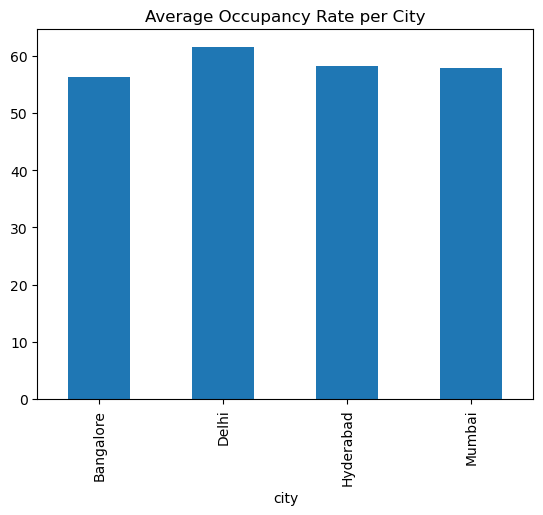

In [74]:
df.groupby('city')['occ_pct'].mean().round(2).plot(kind='bar')
plt.title("Average Occupancy Rate per City")

3. When was the occupancy better? weekday or weekend?

In [75]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


Joining above created new dataframe df with df_date

In [76]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,52.0,Premium,Obsidian Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.0,Standard,Obsidian City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.0,Standard,Obsidian Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.0,Standard,Obsidian Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,58.0,Standard,Obsidian Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [77]:
#dropping repeated column
df.drop(columns='date',inplace=True,axis=1)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,52.0,Premium,Obsidian Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.0,Standard,Obsidian City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.0,Standard,Obsidian Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.0,Standard,Obsidian Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,58.0,Standard,Obsidian Grands,Luxury,Mumbai,May 22,W 20,weekeday


Average Occpancy% by day type

In [78]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.36
Name: occ_pct, dtype: float64

4. In month of June what was the occpancy for different cities

In [79]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [81]:
#Creating new dataframe which has only June 22 values
df_june_22=df[df['mmm yy']=='Jun 22']
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,67.0,Standard,Obsidian Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.0,Standard,Obsidian Bay,Luxury,Bangalore,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,57.0,Standard,Obsidian Palace,Business,Bangalore,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.0,Standard,Obsidian Grands,Luxury,Mumbai,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,58.0,Standard,Obsidian Grands,Luxury,Delhi,Jun 22,W 24,weekeday


In [82]:
#Average occupancy in different cities in June month
df_june_22.groupby('city')['occ_pct'].mean().round(2)

city
Bangalore    56.44
Delhi        62.49
Hyderabad    58.47
Mumbai       58.39
Name: occ_pct, dtype: float64

Adding new sheet to data frame

In [83]:
df_august=pd.read_csv(r"C:\Users\Swathi\Desktop\RESUME PROJECTS\PYTHON PROJECT 2\DATASET\new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [90]:
# columns avaialble in df_august dataframe
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%', 'occ_pct'],
      dtype='object')

In [89]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [88]:
df_august['occ_pct']=df_august['occ%']
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92,76.92


In [92]:
df_august.drop(columns='occ%',inplace=True,axis=1)
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


Concating or Appending New data to previous data and generating new dataframe latest_df

In [95]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
6494,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Obsidian Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6495,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Obsidian Palace,Business,Bangalore,Jul 22,W 32,weekend
6496,17561,31-Jul-22,RT4,3,4.0,75.00,Presidential,Obsidian Blu,Luxury,Mumbai,Jul 22,W 32,weekend
6497,16559,01-Aug-22,RT1,30,30.0,100.00,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
6498,19562,01-Aug-22,RT1,21,30.0,70.00,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
6499,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
6500,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
6501,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
6502,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6503,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


In [96]:
latest_df.shape

(6504, 13)

6. Revenue realised per city

For that merging of two dataframes df_bookings & df_hotels is required


In [97]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,4/30/2022,5/1/2022,5/2/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,4/27/2022,5/1/2022,5/2/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,5/1/2022,5/1/2022,5/3/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,4/28/2022,5/1/2022,5/6/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,4/26/2022,5/1/2022,5/3/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [98]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Obsidian Grands,Luxury,Delhi
1,16559,Obsidian Exotica,Luxury,Mumbai
2,16560,Obsidian City,Business,Delhi
3,16561,Obsidian Blu,Luxury,Delhi
4,16562,Obsidian Bay,Luxury,Delhi


In [99]:
#merging these tables
df_booking_all=pd.merge(df_bookings,df_hotels,on='property_id')
df_booking_all.head()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,4/30/2022,5/1/2022,5/2/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi
1,May012216558RT15,16558,4/27/2022,5/1/2022,5/2/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Obsidian Grands,Luxury,Delhi
2,May012216558RT16,16558,5/1/2022,5/1/2022,5/3/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Obsidian Grands,Luxury,Delhi
3,May012216558RT17,16558,4/28/2022,5/1/2022,5/6/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi
4,May012216558RT18,16558,4/26/2022,5/1/2022,5/3/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Obsidian Grands,Luxury,Delhi


In [100]:
#Revenue realised per city
df_booking_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

7. Revenue realised by month

In [102]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [104]:
#Merging date table with latest merged table
pd.merge(df_booking_all,df_date,left_on='check_in_date',right_on='date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


Output is null: Reason can be - date format doesnt match


In [105]:
# df_booking_all data info
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [106]:
#df_date data info
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [107]:
# changing datatype of date column from object to datetime
df_date['date']=pd.to_datetime(df_date['date'])
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [108]:
#changing datatype of check_in_date column from object to datetime
df_booking_all['check_in_date']=pd.to_datetime(df_booking_all['check_in_date'])
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,4/30/2022,2022-05-01,5/2/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi
1,May012216558RT15,16558,4/27/2022,2022-05-01,5/2/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Obsidian Grands,Luxury,Delhi
2,May012216558RT16,16558,5/1/2022,2022-05-01,5/3/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Obsidian Grands,Luxury,Delhi
3,May012216558RT17,16558,4/28/2022,2022-05-01,5/6/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi
4,May012216558RT18,16558,4/26/2022,2022-05-01,5/3/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Obsidian Grands,Luxury,Delhi


In [109]:
df_booking_all=pd.merge(df_booking_all, df_date, left_on='check_in_date',right_on='date')
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,4/30/2022,2022-05-01,5/2/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,4/27/2022,2022-05-01,5/2/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Obsidian Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,5/1/2022,2022-05-01,5/3/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Obsidian Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,4/28/2022,2022-05-01,5/6/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Obsidian Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,4/26/2022,2022-05-01,5/3/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Obsidian Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [110]:
#revenue realized by month
df_booking_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

Revenue realized per hotel type

In [111]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Obsidian Grands,Luxury,Delhi
1,16559,Obsidian Exotica,Luxury,Mumbai
2,16560,Obsidian City,Business,Delhi
3,16561,Obsidian Blu,Luxury,Delhi
4,16562,Obsidian Bay,Luxury,Delhi


In [112]:
# Revenue realized by Hotel Category
df_booking_all.groupby('category')['revenue_realized'].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

In [113]:
# Revenue realized by Each Property
df_booking_all.groupby('property_name')['revenue_realized'].sum()

property_name
Obsidian Bay        259996918
Obsidian Blu        260851922
Obsidian City       285798439
Obsidian Exotica    320258588
Obsidian Grands     211462134
Obsidian Palace     304081863
Obsidian Seasons     66086735
Name: revenue_realized, dtype: int64

Average Hotel rating per city

In [114]:
df_booking_all.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

Pie chart of revenue realized per booking platform

In [118]:
df_booking_platform=df_booking_all.groupby('booking_platform')['revenue_realized'].sum()
df_booking_platform

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

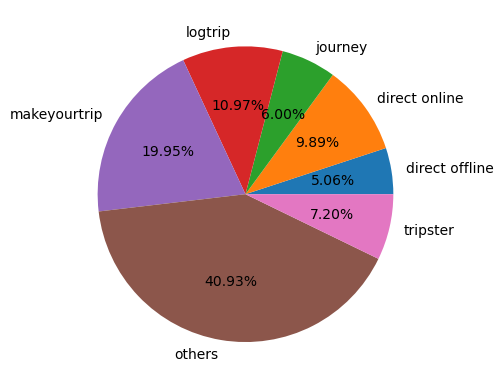

In [120]:
plt.pie(df_booking_platform, labels=df_booking_platform.index, autopct='%1.2f%%')
plt.show()